In [67]:
# Impoting python libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# Importing Dataset
df = pd.read_csv("netflix_titles.csv") ## Taken From kaggle

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### This netflix dataset has information about TV shows and movies avalable on Netflix till 2021

In [8]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [10]:
df.shape ## It has 12 features 

(8807, 12)

In [12]:
df.size

105684

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.describe()# As all are of object type we get only release date

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### I have a data from 1925 to 2021, 75% of the shows were release in 2019 and 50% of the shows in 2017 and we dont have any data missing

In [20]:
df.duplicated().sum()

0

##### I Dont have any Duplicate value

In [23]:
## Null Values

<Axes: >

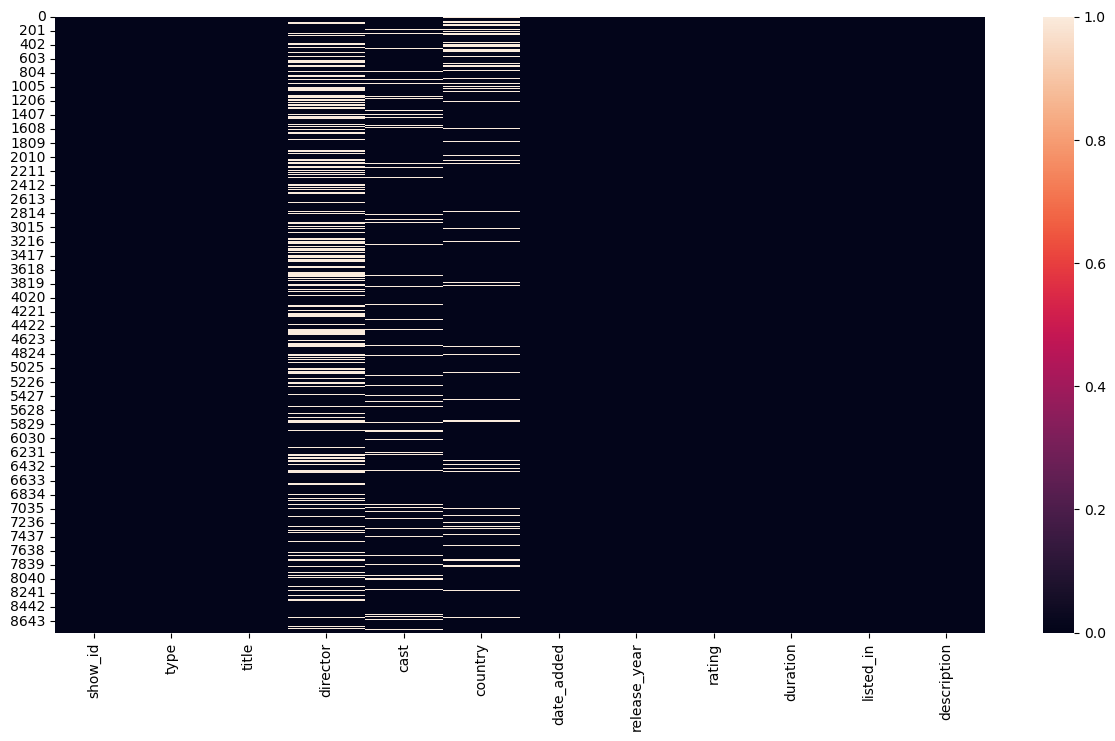

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

#### We have 30% Missing data in director,9.36% in cast,9.43% in country,0.11% in date_added,0.045% in rating,0.034% in duration

### We have 30% Director name missing and we will fill those with 'Not Specified'

In [42]:
df['director'].fillna('Not Specified',inplace=True)

C:\Users\Aditya Dubey\AppData\Local\Temp\ipykernel_14636\3507233891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Specified',inplace=True)


In [44]:
df['director'].unique()

array(['Kirsten Johnson', 'Not Specified', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [83]:
D = df.groupby(['director']).size().reset_index(name='counts')

In [99]:
D

,director,counts
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4524,Çagan Irmak,1
4525,Ísold Uggadóttir,1
4526,Óskar Thór Axelsson,1
4527,Ömer Faruk Sorak,2


## Analysing Rating

In [59]:
x = df.groupby(['rating']).size().reset_index(name='counts')

In [103]:
x

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


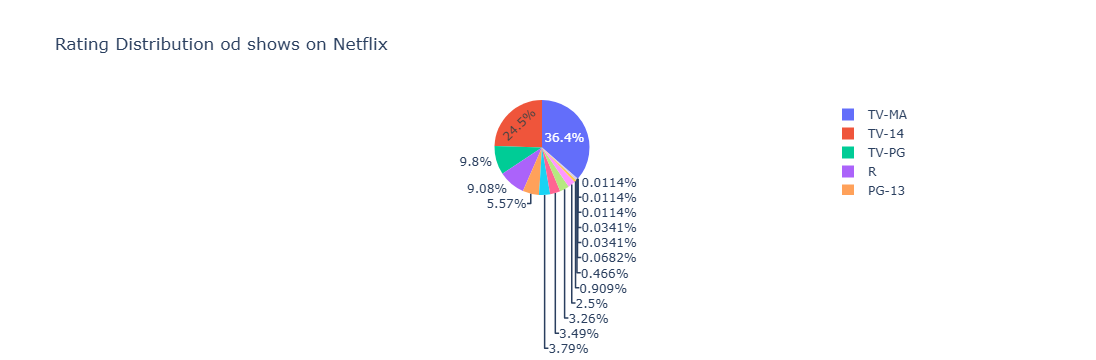

In [79]:
px.pie(x,values='counts',names='rating',title='Rating Distribution od shows on Netflix')

In [119]:
Director_List = pd.DataFrame(df['director'].str.split(",",expand=True).stack(),columns=['Directors'])

In [121]:
Director_List

,,Directors
0,0,Kirsten Johnson
1,0,Not Specified
2,0,Julien Leclercq
3,0,Not Specified
4,0,Not Specified
...,...,...
8802,0,David Fincher
8803,0,Not Specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [127]:
directors = Director_List.groupby(['Directors']).size().reset_index(name='Total Counts')

In [129]:
directors

,Directors,Total Counts
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [137]:
directors = directors[directors.Directors != 'Not Specified']

In [139]:
directors

,Directors,Total Counts
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [143]:
directors = directors.sort_values(by = ['Total Counts'],ascending=False)
directors

,Directors,Total Counts
4021,Rajiv Chilaka,22
261,Jan Suter,18
4068,Raúl Campos,18
3235,Marcus Raboy,16
4652,Suhas Kadav,16
...,...,...
3217,Marc Meyers,1
3216,Marc Levin,1
3215,Marc Francis,1
3214,Marc Fouchard,1


## Top 5 Director

In [150]:
Top_5_Directors = directors.head()
Top_5_Directors

,Directors,Total Counts
4021,Rajiv Chilaka,22
261,Jan Suter,18
4068,Raúl Campos,18
3235,Marcus Raboy,16
4652,Suhas Kadav,16


#### Visualisation

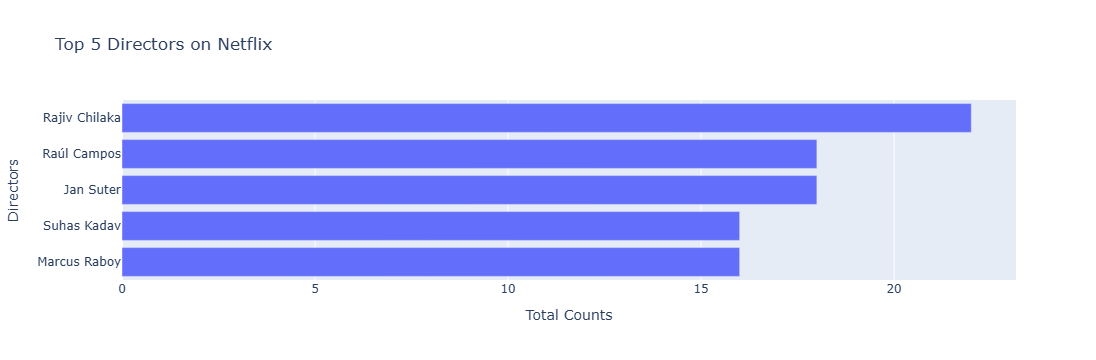

In [159]:
px.bar(Top_5_Directors.sort_values(by = ['Total Counts']),x='Total Counts',y='Directors',title="Top 5 Directors on Netflix")

#### Handling the null value 

In [162]:
df['cast'].fillna('No Cast Specified',inplace=True)

C:\Users\Aditya Dubey\AppData\Local\Temp\ipykernel_14636\2773188783.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [164]:
df['cast'].isnull().sum()

0

In [170]:
Cast_List = pd.DataFrame(df['cast'].str.split(",",expand=True).stack(),columns=['Actors'])

In [172]:
Cast_List

Actors
0    0       No Cast Specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [176]:
Cast = Cast_List.groupby(['Actors']).size().reset_index(name='Total Counts')

In [178]:
Cast

,Actors,Total Counts
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39292,İbrahim Büyükak,1
39293,İbrahim Çelikkol,1
39294,Şahin Irmak,1
39295,Şükrü Özyıldız,1


In [188]:
Cast = Cast[Cast.Actors != 'No Cast Specified']

In [190]:
Cast

,Actors,Total Counts
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39292,İbrahim Büyükak,1
39293,İbrahim Çelikkol,1
39294,Şahin Irmak,1
39295,Şükrü Özyıldız,1


In [192]:
Cast = Cast.sort_values(by = ['Total Counts'],ascending=False)
Cast

,Actors,Total Counts
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
...,...,...
15290,João Côrtes,1
15289,João Assunção,1
15288,Joziah Lagonoy,1
15287,Jozef Gjura,1


In [194]:
Top_5_Actors = Cast.head()
Top_5_Actors

,Actors,Total Counts
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27


#### Visualising

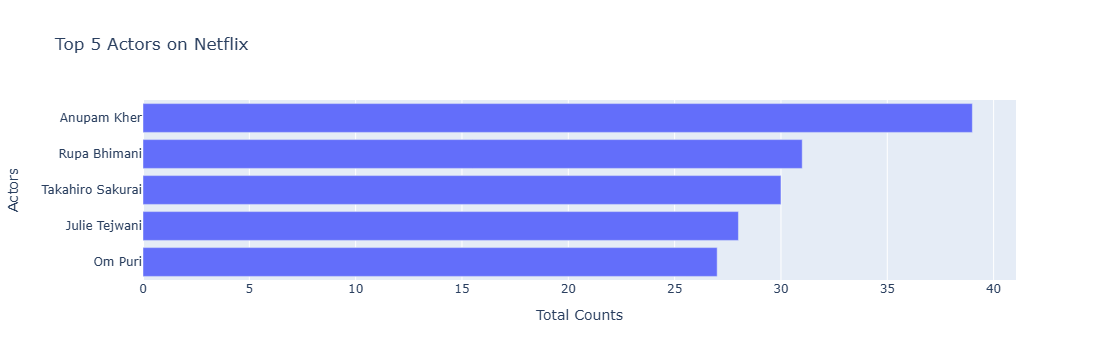

In [197]:
px.bar(Top_5_Actors.sort_values(by = ['Total Counts']),x='Total Counts',y='Actors',title="Top 5 Actors on Netflix")

### Analysing the content produced on netflix based on years

In [200]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns={'release_year':'Release Year','type':'Type'})
df2 = df1.groupby(['Release Year','Type']).size().reset_index(name='Total_Counts')

In [202]:
df2

,Release Year,Type,Total_Counts
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


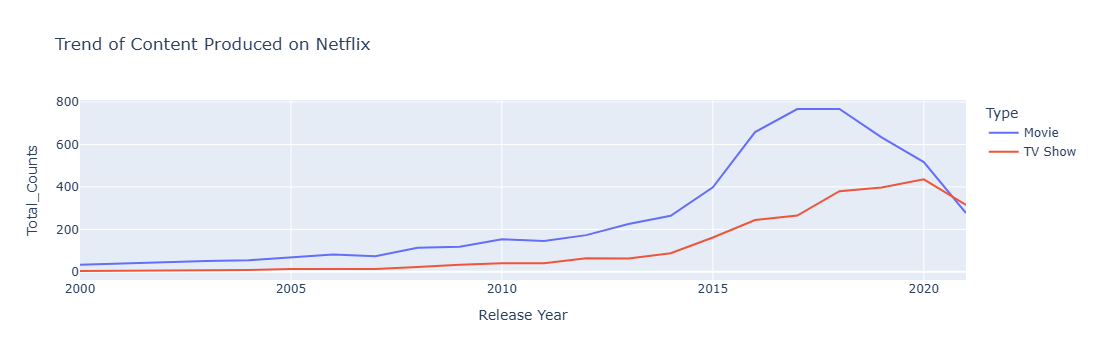

In [210]:
# Visualise
df2 = df2[df2['Release Year']>=2000]
px.line(df2,x='Release Year',y='Total_Counts',color='Type',title='Trend of Content Produced on Netflix')

# Sentiment Analysis on Netflix Content

In [233]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 1.6 MB/s eta 0:00:00


In [239]:
from textblob import TextBlob
df3 = df[['release_year','description']]
df3 = df.rename(columns={'release_year':'Release Year','description':'Description'})
for index,row in df3.iterrows():
    d=row['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p == 0:
       sent = 'Neutral'
    elif p>0:
       sent = 'Positive'
    else:
        sent = 'Negative'
    df3.loc[[index,2],'Sentiment']=sent

df3 = df3.groupby(['Release Year','Sentiment']).size().reset_index(name='Total_Counts')
df3 = df3[df3['Release Year']>2005]

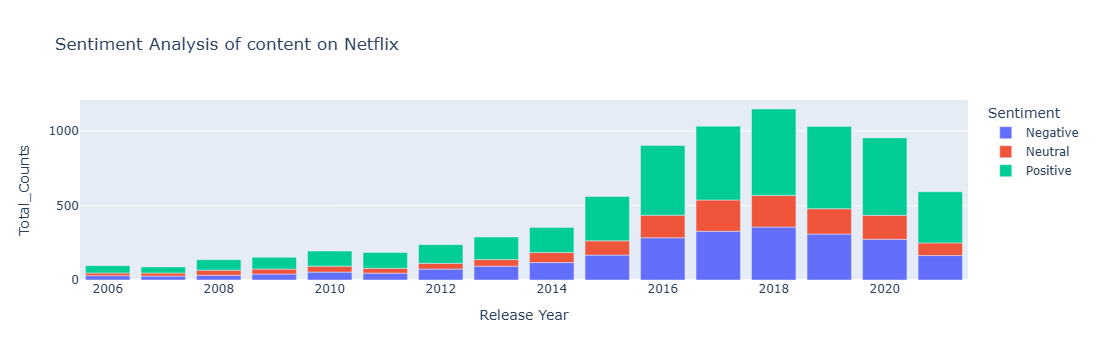

In [241]:
px.bar(df3,x='Release Year',y='Total_Counts',color='Sentiment',title='Sentiment Analysis of content on Netflix')

# Netflix is Creating More Positive Content Than Negative Content Over the Year.

# Movie Genre

In [278]:
Movie_Genre_List = pd.DataFrame(df['listed_in'].str.split(",",expand=True).stack(),columns=['Movie_Genre'])
Movie_Genre_List =  Movie_Genre_List.groupby(['Movie_Genre']).size().reset_index(name='Total Counts')

In [280]:
Movie_Genre_List

,Movie_Genre,Total Counts
0,Anime Features,50
1,Children & Family Movies,36
2,Classic & Cult TV,6
3,Classic Movies,36
4,Comedies,464
...,...,...
68,TV Dramas,67
69,TV Horror,11
70,TV Sci-Fi & Fantasy,1
71,TV Shows,16


In [286]:
Movie_Genre_List = Movie_Genre_List.sort_values(by = ['Total Counts'],ascending=False)
Top_5_Movie_Genre = Movie_Genre_List.head()

## Top 5 Movie Genre People Are Watching on Netflix

In [288]:
Top_5_Movie_Genre

,Movie_Genre,Total Counts
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829


#### Visualising

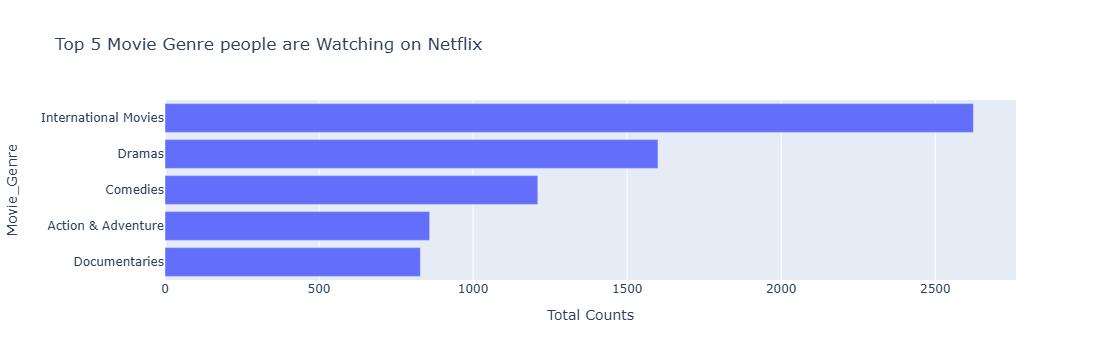

In [292]:
px.bar(Top_5_Movie_Genre.sort_values(by = ['Total Counts']),x='Total Counts',y='Movie_Genre',title="Top 5 Movie Genre people are Watching on Netflix")